In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

In [2]:
n = 20

In [3]:
random.seed(1)

In [4]:
start = 0
jumpsum = 0
total_jumps = 0
n_trys = 100000

x = []
y = []
eval = []
evalr = []
evalr2 = []
evalr3 = []
sigma = []

In [5]:
for npad in range(1,n+1): 

    if (npad == 1):
        eval.append(1)
        evalr.append(1)
    else:
        sum = 0.0
        for i in range(1,npad):
            #print(i,npad,eval[npad-i-1])
            sum = sum + 1.0/npad*(1.0+eval[npad-i-1])
        sum = sum + 1.0/npad
        eval.append(sum)
        #evalr.append(eval[npad-1]/npad)
        evalr.append(eval[npad-1])
    print("Theory: ",npad,eval[npad-1])
    
    sum = 0.0
    for i in range(1,npad+1):
        sum = sum + 1.0/i
    evalr2.append(sum)
    
    x.append(npad)
    
    sum2 = 1.0/stats.hmean(x)*npad
    evalr3.append(sum2)
    
    #print (npad,sum2)
    
    end = npad
    for j in range(n_trys):
        while start < npad:
            jump = int(random.uniform(1,(end-start+1)))
            #print ("Jump = ",jump)
            start = start + jump
            #print ("Now at ",start)
            jumpsum = jumpsum + 1
        start = 0
        #print ("j = %d, Total_jumps = %d" % (j,jumpsum))
        total_jumps = total_jumps + jumpsum
        jumpsum = 0
    
    #print (npad,total_jumps,n_trys)

    expectation_value = total_jumps/n_trys*1.0
    y.append(expectation_value)
    sigma.append(expectation_value*1/np.sqrt(n_trys))
    total_jumps = 0
    
    print ("Expectation value for n = %d is %f +/- %f" % (npad,expectation_value,expectation_value*1/np.sqrt(n_trys)))
    

Theory:  1 1
Expectation value for n = 1 is 1.000000 +/- 0.003162
Theory:  2 1.5
Expectation value for n = 2 is 1.500280 +/- 0.004744
Theory:  3 1.8333333333333333
Expectation value for n = 3 is 1.829110 +/- 0.005784
Theory:  4 2.083333333333333
Expectation value for n = 4 is 2.083480 +/- 0.006589
Theory:  5 2.2833333333333337
Expectation value for n = 5 is 2.280940 +/- 0.007213
Theory:  6 2.4499999999999997
Expectation value for n = 6 is 2.457640 +/- 0.007772
Theory:  7 2.5928571428571425
Expectation value for n = 7 is 2.591740 +/- 0.008196
Theory:  8 2.7178571428571425
Expectation value for n = 8 is 2.720050 +/- 0.008602
Theory:  9 2.8289682539682537
Expectation value for n = 9 is 2.828080 +/- 0.008943
Theory:  10 2.928968253968254
Expectation value for n = 10 is 2.926750 +/- 0.009255
Theory:  11 3.0198773448773446
Expectation value for n = 11 is 3.018810 +/- 0.009546
Theory:  12 3.1032106782106785
Expectation value for n = 12 is 3.103960 +/- 0.009816
Theory:  13 3.1801337551337556
E

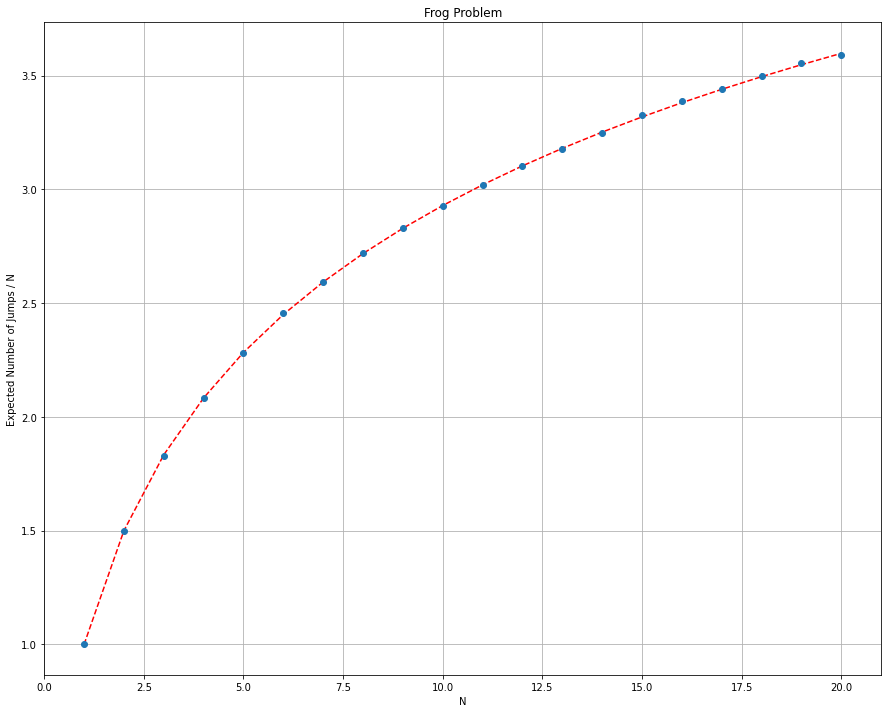

In [6]:
def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x+paramlist[2]*x*x+paramlist[3]*x*x*x


fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(0,n+1)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')
ax1.plot(x,evalr,'r--')
#ax1.plot(x,evalr2,'b--')
#ax1.plot(x,evalr3,'g--')
